# Ноутбук c примерами работы со средой  Gym-GPN

##  Загрузка библиотек

In [1]:
import gym
import gym_gpn

In [2]:
from time import sleep
import numpy as np

## Создание объекта среды

In [3]:
env = gym.make('gpn-v0')

In [4]:
# создание инстанста виртуальной АЗС
env.create_thread(token = 'df133af2-dccb-4f06-b31f-bf99c02b1ba9')

# Методы среды `gym_gpn`

## `.step()` – запуск среды по шагам (итерациям)

### Один шаг

In [5]:
# Совершение одного шага в среде.
# Среда принимает действие и возвращает кортеж (observation, reward, done, info).
res = env.step(100)
res

({'cost': 35,
  'date_time': '2018-07-27T00:00:00',
  'price': 55.0,
  'volume': 90.14},
 4957.7,
 False,
 {})

In [6]:
# observation
print('date_time: ', res[0]['date_time'])
print('price: ', res[0]['price'])
print('cost: ', res[0]['cost'])
print('volume: ', res[0]['volume'])

# reward, done, info
print('reward: ', res[1])
print('done (flag): ', res[2])
print('additional data: ', res[3])

date_time:  2018-07-27T00:00:00
price:  55.0
cost:  35
volume:  90.14
reward:  4957.7
done (flag):  False
additional data:  {}


## `.reset()` – cброс среды к начальному состоянию

In [7]:
env.reset()
print(env.state)
# создание инстанста виртуальной АЗС
env.create_thread(token = 'df133af2-dccb-4f06-b31f-bf99c02b1ba9')

None


# Пример агентной модели

## Загрузка библиотек

In [8]:
import sys
sys.path.append('./examples/agents/')
from RandomWalk import RandomWalkAgent

## RandomWalkAgent

In [9]:
agnt = RandomWalkAgent(env.low_price, env.high_price)

In [10]:
# действие
agnt.act()

39

In [11]:
%%time

done = env.done
ts = []
while not done:
    try:
        price = 55
        ob, reward, done, _ = env.step(price)
        ts.append([ob, reward])
    except:
        continue

CPU times: user 2.53 s, sys: 440 ms, total: 2.97 s
Wall time: 3min 31s


In [12]:
env.cum_reward

12525274.85

# Visualize some data

In [13]:
import pandas as pd

In [14]:
X = []
for el in ts:
    X.append(el[0])

In [15]:
X = pd.DataFrame.from_dict(X)

In [16]:
X.drop(columns  = ['cost'], inplace = True)

In [17]:
X.date_time = pd.to_datetime(X.date_time)

In [18]:
X['reward'] = X.price.values * X.volume.values

In [19]:
X['year'] = X['date_time'].map(lambda x: x.year)

In [20]:
X['month'] = X['date_time'].map(lambda x: x.month)

In [21]:
X['day'] = X['date_time'].map(lambda x: x.day)

In [22]:
X['hour'] = X['date_time'].map(lambda x: x.hour)

In [23]:
X.head()

,date_time,price,volume,reward,year,month,day,hour
0,2018-07-27 00:00:00,43.0,96.90,4166.70,2018,7,27,0
1,2018-07-27 01:00:00,30.0,77.51,2325.30,2018,7,27,1
2,2018-07-27 02:00:00,43.0,55.58,2389.94,2018,7,27,2
3,2018-07-27 03:00:00,44.0,47.29,2080.76,2018,7,27,3
4,2018-07-27 04:00:00,33.0,67.73,2235.09,2018,7,27,4


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

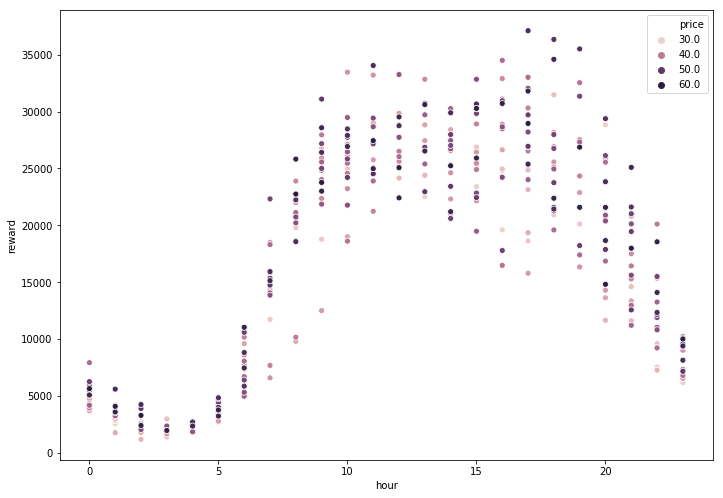

In [25]:
grouped = X.groupby(['price', 'hour'], as_index=False)['reward'].mean()

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(data = grouped, x ='hour', y='reward', hue = 'price', ax = ax)